In [ ]:
OBERSERVED TREND1: From the Max_Temp vs Lattitude graph its clear that as one goes away from the equator, the 
temperature starts decreasing on either side. There are more number of points on the right side of the graph,
because there are more number of cities (more land) in the northern hemisphere, as compared to southern hemisphere. 
Also, there are more number of cities father north than in father south, and so the graph is bent more on the 
righ side with even lower temperatures as they are closer to north pole. 

OBERSERVED TREND2: From the Wind_Speed vs Lattitude graph it seems that on the equator and very close to eqautor 
wind_speed is low as compared to both sides. This is a very narrow region on and adjacent to the equator. No such 
trend is observed for humidity and cloudiness graphs. 
         
OBERSERVED TREND3: The trend for the stated above in Max_Temp vs Lattitude graph is very prominent with hardly 
any outliers. We think that to prove or disprove global warming on the basis of data, same graph can be generated 
with historical data on the same day and month, 10 years apart (i.e. every decade) going backwards for the cities 
for which histtorical data is available as much before in time as possible. 

RECOMMENDATION: Cruise ships and freight ocean carriers whose routes are close to equator, have an opportunity to 
cut down fuel costs significantly, as they can tap the opportunities below. Fuel costs are a major expense for 
the ocean liner industry. 

1) They are big, with high solar catchment (exposure to sun) area. As the sun is extremely bright they should have 
open solar roofs which will also provide shadow for travelers, and produce electricity in huge amounts, thereby 
significantly cutting down fuel costs, as else fuel is used to generate electricity.

2) As the roof will provide shadow from the hot sun, their cooling costs will go down too. This is true for the 
frozen cargo ocean liners too. 


In [1]:
# Dependencies
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import openweathermapy as ow
from citipy import citipy
import requests
import time
import random
from config import openweathermap_key

In [2]:
cities = []
country_code =[]

bignum = 3000 # get way > than 500 random cities as many cities aren't covered by openweathermap & lead to 404 error
url = "http://api.openweathermap.org/data/2.5/weather?" 

while len(cities) < bignum:                                      # num set to number of cities you need data for
    latitude = random.uniform(-1, 1) * 90                     # get random latitude
    longitude = random.uniform(-1, 1) * 180                   # get random longitude
    city = citipy.nearest_city(latitude, longitude)           # get nearest city from latitude & longitude
    if city not in cities:                                    # skip duplicate city
        cities.append(city.city_name)                         # save city in the cities list
        country_code.append((city.country_code).upper())

print(cities)

['mar del plata', 'tuktoyaktuk', 'mar del plata', 'hilo', 'rikitea', 'meybod', 'albany', 'ushuaia', 'dikson', 'east london', 'tacuarembo', 'college', 'necochea', 'vanderhoof', 'longyearbyen', 'saint-philippe', 'dikson', 'punta arenas', 'coquimbo', 'vaini', 'nikolskoye', 'ahipara', 'broome', 'albany', 'tasiilaq', 'albany', 'kapaa', 'severo-kurilsk', 'albany', 'chuy', 'hilo', 'san carlos', 'mehamn', 'tessalit', 'mataura', 'hithadhoo', 'nabire', 'atuona', 'leningradskiy', 'rikitea', 'kasongo-lunda', 'ryotsu', 'victoria', 'biloela', 'barentsburg', 'izhma', 'coahuayana', 'saint-augustin', 'hilo', 'punta arenas', 'delhi', 'tiksi', 'thompson', 'adrar', 'tasiilaq', 'high prairie', 'souillac', 'alice springs', 'temaraia', 'avarua', 'illoqqortoormiut', 'sistranda', 'nanortalik', 'cagayan de tawi-tawi', 'the valley', 'cidreira', 'roald', 'rikitea', 'taolanaro', 'vaitupu', 'hermanus', 'tumannyy', 'bria', 'arraial do cabo', 'port alfred', 'busselton', 'ushuaia', 'chaman', 'hermanus', 'grand gaube',

In [3]:
temperature = []
humidity = []
cloudiness = []
windspeed = []
weather_data = []
date = []
lat = []
lng = []
set = 0
ncity = 0
innerloop = 51   # 51 in each run before delay of 61 sec
num = 505

while ncity < num:      # counter for outer loop which is executed 10 times
    j = 0                  # reset inner loop counter for next 51 iterations. (so data for 51x10 = 510 cities) 
    while j < innerloop:   # data extracted in 51 calls each time, separated by 61 sec delays.
        # For temp in Fahrenheit & wind speed in mph, added "&units=imperial" in the query_url below.
        print("ncity = " + str(ncity))
        query_url = url + "q=" +  cities[ncity] + "," +  country_code[ncity] + "&appid=" + openweathermap_key + "&units=imperial"
        response = requests.get(query_url).json()             # get new city's weather using query_url
        if response["cod"] != 200:   # if any code other than 'ok', skip and go for next city
            cities.pop(ncity)
            country_code.pop(ncity)
            continue
        weather_data.append(response) 
        print("City Number = " + str(ncity) + ", Processing record " + str(j) + " of set "+ str(set) + " | " + cities[ncity])
        print(query_url)
        lat.append(response["coord"]["lat"])                  # save latitude in the latitudes list
        lng.append(response["coord"]["lon"])                  # save longitude in the longitudes list
        weather_data.append(response)                         # save new city's weather in weather_data list
        temperature.append(response["main"]["temp_max"])      # save new city's max temperature in temperature list
        humidity.append(response["main"]["humidity"])         # save new city's humidity in humidity list
        cloudiness.append(response["clouds"]["all"])          # save new city's clouds in cloudiness list
        windspeed.append(response["wind"]["speed"])           # save new city's windspeed in windspeed list
        date.append(response["dt"])
        ncity = ncity + 1
        j=j+1   # if response["cod"] == 200, then you want to increment the counter too for the next iteration. 
    set = set+1 # go for the next set of 50 calls/cities
    time.sleep(61)   # delay just over a minute as only upto 60 calls/min are allowed.


ncity = 0
City Number = 0, Processing record 0 of set 0 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar del plata,AR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 1
City Number = 1, Processing record 1 of set 0 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,CA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 2
City Number = 2, Processing record 2 of set 0 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar del plata,AR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 3
City Number = 3, Processing record 3 of set 0 | hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo,US&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 4
City Number = 4, Processing record 4 of set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea,PF&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 5
City Number = 5, Processing record 5 of set 0 | meybod
http://ap

City Number = 45, Processing record 45 of set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,CL&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 46
City Number = 46, Processing record 46 of set 0 | delhi
http://api.openweathermap.org/data/2.5/weather?q=delhi,CA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 47
City Number = 47, Processing record 47 of set 0 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi,RU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 48
City Number = 48, Processing record 48 of set 0 | thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson,CA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 49
City Number = 49, Processing record 49 of set 0 | adrar
http://api.openweathermap.org/data/2.5/weather?q=adrar,DZ&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 50
City Number = 50, Processing record 50 of set 0 | tasiilaq
http://api.openweathermap.

City Number = 89, Processing record 38 of set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh,RU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 90
City Number = 90, Processing record 39 of set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,CL&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 91
City Number = 91, Processing record 40 of set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 92
City Number = 92, Processing record 41 of set 1 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma,AR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 93
City Number = 93, Processing record 42 of set 1 | east london
http://api.openweathermap.org/data/2.5/weather?q=east london,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 94
City Number = 94, Processing record 43 of set 1 | half mo

City Number = 133, Processing record 31 of set 2 | flin flon
http://api.openweathermap.org/data/2.5/weather?q=flin flon,CA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 134
City Number = 134, Processing record 32 of set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 135
City Number = 135, Processing record 33 of set 2 | east london
http://api.openweathermap.org/data/2.5/weather?q=east london,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 136
City Number = 136, Processing record 34 of set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,CA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 137
City Number = 137, Processing record 35 of set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff,NZ&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 138
City Number = 138, Processing record 36 of set 2 | 

City Number = 177, Processing record 24 of set 3 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?q=sao miguel do araguaia,BR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 178
City Number = 178, Processing record 25 of set 3 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria,SC&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 179
City Number = 179, Processing record 26 of set 3 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,RU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 180
City Number = 180, Processing record 27 of set 3 | shache
http://api.openweathermap.org/data/2.5/weather?q=shache,CN&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 181
City Number = 181, Processing record 28 of set 3 | kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak,US&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 182
City Number = 182, Processing rec

City Number = 221, Processing record 17 of set 4 | dunedin
http://api.openweathermap.org/data/2.5/weather?q=dunedin,NZ&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 222
City Number = 222, Processing record 18 of set 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,CL&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 223
City Number = 223, Processing record 19 of set 4 | hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 224
City Number = 224, Processing record 20 of set 4 | cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 225
City Number = 225, Processing record 21 of set 4 | atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona,PF&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 226
City Number = 226, Processing record 22 of set 4 | urubicha
http:

City Number = 265, Processing record 10 of set 5 | north bend
http://api.openweathermap.org/data/2.5/weather?q=north bend,US&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 266
City Number = 266, Processing record 11 of set 5 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea,PF&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 267
City Number = 267, Processing record 12 of set 5 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 268
City Number = 268, Processing record 13 of set 5 | great yarmouth
http://api.openweathermap.org/data/2.5/weather?q=great yarmouth,GB&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 269
City Number = 269, Processing record 14 of set 5 | huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey,PE&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 270
ncity = 270
City Number = 270, Processing record 15 of se

City Number = 308, Processing record 2 of set 6 | mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 309
City Number = 309, Processing record 3 of set 6 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 310
City Number = 310, Processing record 4 of set 6 | new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new norfolk,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 311
City Number = 311, Processing record 5 of set 6 | conde
http://api.openweathermap.org/data/2.5/weather?q=conde,BR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 312
City Number = 312, Processing record 6 of set 6 | hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 313
City Number = 313, Processing record 7 of set 6 | irtyshskiy
http://api.openweathe

City Number = 352, Processing record 46 of set 6 | cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 353
City Number = 353, Processing record 47 of set 6 | hailar
http://api.openweathermap.org/data/2.5/weather?q=hailar,CN&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 354
City Number = 354, Processing record 48 of set 6 | castro
http://api.openweathermap.org/data/2.5/weather?q=castro,CL&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 355
ncity = 355
City Number = 355, Processing record 49 of set 6 | serra
http://api.openweathermap.org/data/2.5/weather?q=serra,BR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 356
City Number = 356, Processing record 50 of set 6 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,ZA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 357
City Number = 357, Processing record 0 of set 7 | kapaa
http:

City Number = 396, Processing record 39 of set 7 | cherskiy
http://api.openweathermap.org/data/2.5/weather?q=cherskiy,RU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 397
City Number = 397, Processing record 40 of set 7 | ilulissat
http://api.openweathermap.org/data/2.5/weather?q=ilulissat,GL&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 398
ncity = 398
City Number = 398, Processing record 41 of set 7 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,CL&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 399
City Number = 399, Processing record 42 of set 7 | port hardy
http://api.openweathermap.org/data/2.5/weather?q=port hardy,CA&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 400
ncity = 400
City Number = 400, Processing record 43 of set 7 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff,NZ&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 401
City Number = 401, Processing rec

City Number = 440, Processing record 32 of set 8 | kamenka
http://api.openweathermap.org/data/2.5/weather?q=kamenka,RU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 441
City Number = 441, Processing record 33 of set 8 | atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona,PF&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 442
City Number = 442, Processing record 34 of set 8 | kosh-agach
http://api.openweathermap.org/data/2.5/weather?q=kosh-agach,RU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 443
City Number = 443, Processing record 35 of set 8 | alice springs
http://api.openweathermap.org/data/2.5/weather?q=alice springs,AU&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 444
ncity = 444
City Number = 444, Processing record 36 of set 8 | san carlos del zulia
http://api.openweathermap.org/data/2.5/weather?q=san carlos del zulia,VE&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 445
City Number = 445, Pr

City Number = 484, Processing record 25 of set 9 | barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow,US&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 485
City Number = 485, Processing record 26 of set 9 | honiara
http://api.openweathermap.org/data/2.5/weather?q=honiara,SB&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 486
City Number = 486, Processing record 27 of set 9 | porto velho
http://api.openweathermap.org/data/2.5/weather?q=porto velho,BR&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 487
City Number = 487, Processing record 28 of set 9 | kavaratti
http://api.openweathermap.org/data/2.5/weather?q=kavaratti,IN&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 488
City Number = 488, Processing record 29 of set 9 | kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak,US&appid=3504353c7e51580e77211d6e4ff867b0&units=imperial
ncity = 489
ncity = 489
City Number = 489, Processing record 30 of set 9 | kapa

In [11]:
City = cities[:505]
Country=country_code[:505]
Date = date[:505]
Lat=lat[:505]
Lng=lng[:505]
Humidity=humidity[:505]
Max_Temp=temperature[:505]
Cloudiness = cloudiness[:505]
Wind_Speed = windspeed[:505]

cities_df = pd.DataFrame(dict(City=City, Country=Country, Date=Date, Lat=Lat, Lng=Lng, Humidity=Humidity, Max_Temp=Max_Temp, Cloudiness=Cloudiness, Wind_Speed=Wind_Speed))
cities_df = cities_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max_Temp", "Wind_Speed"]]
cities_df.to_csv("cities_weather_data.csv", encoding="utf-8", index=False)
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,mar del plata,75,AR,1510984800,81,-38.00,-57.56,48.20,4.70
1,tuktoyaktuk,90,CA,1510984800,84,69.45,-133.04,-0.41,5.82
2,mar del plata,75,AR,1510984800,81,-38.00,-57.56,48.20,4.70
3,hilo,1,US,1510984560,83,19.73,-155.09,69.80,4.70
4,rikitea,12,PF,1510986931,100,-23.12,-134.97,72.94,21.23
5,meybod,0,IR,1510984800,23,32.25,54.02,53.60,2.24
6,albany,88,AU,1510986924,92,-35.02,117.89,66.23,6.91
7,ushuaia,75,AR,1510984800,70,-54.80,-68.30,44.60,9.17
8,dikson,0,RU,1510987335,100,73.51,80.55,-3.75,13.40
9,east london,0,ZA,1510984800,55,-33.02,27.91,64.40,5.82


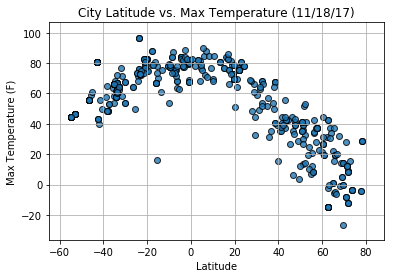

In [13]:
max_temp = cities_df['Max_Temp'].max()
min_temp = cities_df['Max_Temp'].min()
max_lat  = cities_df['Lat'].max()
min_lat  = cities_df['Lat'].min()

plt.scatter(cities_df["Lat"], 
            cities_df["Max_Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

Date = time.strftime("%D %H:%M", time.localtime(int(date[0]))) # extract date to include in the plot title
Date = Date[:8]   # get only date i.e. first 8 chars of Date string

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + Date + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min_lat -10, max_lat + 10])
plt.ylim([min_temp-10, max_temp+10]) 

# Save the figure
plt.savefig("Max Temperature_Latitude.png")

# Show plot
plt.show()

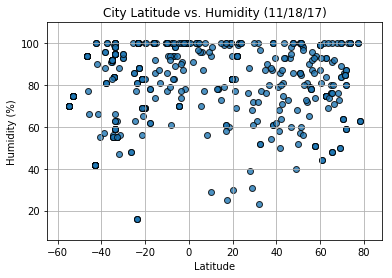

In [14]:
max_humidity = cities_df['Humidity'].max()
min_humidity = cities_df['Humidity'].min()
max_lat  = cities_df['Lat'].max()
min_lat  = cities_df['Lat'].min()

plt.scatter(cities_df["Lat"], 
            cities_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + Date + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min_lat-10, max_lat+10])         # margins so plot axes extend beyond max/min values
plt.ylim([min_humidity-10, max_humidity+10])  # margins so plot axes extend beyond max/min values 

# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

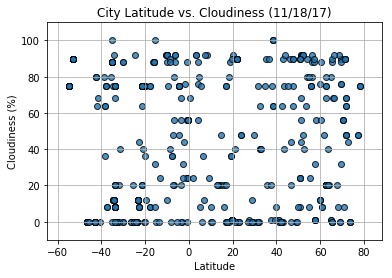

In [15]:
max_cloudiness = cities_df['Cloudiness'].max()
min_cloudiness = cities_df['Cloudiness'].min()
max_lat  = cities_df['Lat'].max()
min_lat  = cities_df['Lat'].min()

plt.scatter(cities_df["Lat"], 
            cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + Date + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min_lat-10, max_lat+10])         # margins so plot axes extend beyond max/min values
plt.ylim([min_cloudiness-10, max_cloudiness+10])  # margins so plot axes extend beyond max/min values 

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

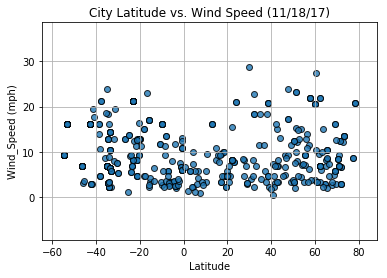

In [16]:
max_windspeed = cities_df['Wind_Speed'].max()
min_windspeed = cities_df['Wind_Speed'].min()
max_lat  = cities_df['Lat'].max()
min_lat  = cities_df['Lat'].min()

plt.scatter(cities_df["Lat"], 
            cities_df["Wind_Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + Date + ")")
plt.ylabel("Wind_Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min_lat-10, max_lat+10])         # margins so plot axes extend beyond max/min values
plt.ylim([min_windspeed-10, max_windspeed+10])         # margins so plot axes extend beyond max/min values 

# Save the figure
plt.savefig("WindSpeed_Latitude.png")

# Show plot
plt.show()